In [1]:
import os
import random
import json
import requests
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

In [2]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)

seed_everything(42) # Seed 고정

In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv('/content/drive/MyDrive/산업정보공학특론/중간이후_sincos최종.csv')
df.dropna(subset = ['datetime'], inplace = True)
df

,datetime,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
0,2024-03-01 15:00,1.1,-5.7,-5.7,69.0,-3.9,338.0,18.5,18.5,0.0,...,112.19,1343583.333,869166.6667,0.000000,186993.5833,202769.0000,474583.3333,373750.0000,-0.707107,-7.071068e-01
1,2024-03-01 16:00,2.2,-4.3,-4.3,55.0,-6.1,315.0,22.2,22.2,0.0,...,138.50,1337416.667,831166.6667,0.000000,181352.4167,197162.6667,506250.0000,395166.6667,-0.866025,-5.000000e-01
2,2024-03-01 17:00,2.2,-5.4,-5.4,64.0,-3.9,315.0,22.2,22.2,0.0,...,99.48,1318833.333,807500.0000,0.000000,161981.6667,177954.0833,511250.0000,285833.3333,-0.965926,-2.588190e-01
3,2024-03-01 18:00,2.2,-2.6,-2.6,64.0,-3.9,338.0,16.7,16.7,0.0,...,95.38,1298750.000,789833.3333,0.000000,140727.0833,156318.1667,508666.6667,283166.6667,-1.000000,-1.110000e-11
4,2024-03-01 19:00,1.1,-5.1,-5.1,69.0,-3.9,338.0,16.7,16.7,0.0,...,91.24,1285500.000,785083.3333,0.000000,128531.5000,143984.9167,500416.6667,275833.3333,-0.965926,2.588190e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,...,87.49,1131833.333,489916.6667,0.000000,197024.2500,197313.7500,644500.0000,360250.0000,-0.965926,2.588190e-01
5890,2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,...,0.00,1146166.667,507500.0000,0.000000,211879.5833,212125.0000,639500.0000,356250.0000,-0.866025,5.000000e-01
5891,2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,...,0.00,1123166.667,529333.3333,0.000000,189122.5833,189367.9167,589000.0000,380916.6667,-0.707107,7.071068e-01
5892,2024-11-04 22:00,15.0,14.3,14.3,58.0,7.2,338.0,9.3,9.3,0.0,...,104.21,1142750.000,577083.3333,3939.449167,191854.0000,196087.6667,572000.0000,391750.0000,-0.500000,8.660254e-01


In [5]:
df.set_index('datetime', inplace = True)

In [6]:
df = df[9:]

df

,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,Bonggae-dong_vis_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-02 0:00,2.2,4.1,2.1,74.0,-2.2,68.0,3.7,3.7,1.0,16.1,...,135.71,1299916.667,678666.6667,107106.575000,34586.68333,157807.3333,621250.0000,519916.6667,-1.370000e-11,1.000000
2024-03-02 1:00,2.8,5.6,2.2,64.0,-2.8,23.0,7.4,7.4,2.0,16.1,...,104.14,1381166.667,668750.0000,194776.083300,28927.51667,239180.5000,712166.6667,498416.6667,2.588190e-01,0.965926
2024-03-02 2:00,3.9,8.8,4.2,60.0,-2.8,315.0,5.6,5.6,4.0,16.1,...,138.50,1402333.333,660250.0000,219012.166700,26907.55833,260131.0833,742166.6667,390750.0000,5.000000e-01,0.866025
2024-03-02 3:00,5.0,6.8,2.7,48.0,-5.0,270.0,11.1,11.1,4.0,16.1,...,95.88,1444416.667,607916.6667,267989.333300,21086.03333,303111.4167,836333.3333,466833.3333,7.071068e-01,0.707107
2024-03-02 4:00,6.1,8.6,3.9,48.0,-3.9,315.0,11.1,11.1,5.0,16.1,...,95.22,1456250.000,614500.0000,281640.083300,20216.61667,315084.5000,841833.3333,460916.6667,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,16.1,...,87.49,1131833.333,489916.6667,0.000000,197024.25000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,16.1,...,0.00,1146166.667,507500.0000,0.000000,211879.58330,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,16.1,...,0.00,1123166.667,529333.3333,0.000000,189122.58330,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107


In [7]:
# # Label
# y = df.pop('smp_rc')
# y

In [8]:
train_df = df[:-144]
test_df = df[-144:]

In [9]:
# y_test

In [10]:
# from sklearn.preprocessing import RobustScaler

# X_scaler = RobustScaler()
# X_scaler.fit(x_train)

# y_scaler = RobustScaler()
# y_scaler.fit(y_train.values.reshape(-1, 1))

In [11]:
# x_train[x_train.columns] = X_scaler.transform(x_train[x_train.columns])
# x_test[x_test.columns] = X_scaler.transform(x_test[x_test.columns])

# y_train = y_scaler.transform(y_train.values.reshape(-1, 1))
# y_test = y_scaler.transform(y_test.values.reshape(-1, 1))


In [12]:
# train_df = x_train
# train_df['smp_rc'] = y_train

# test_df = x_test
# test_df['smp_rc'] = y_test

In [13]:
test_df

,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,Bonggae-dong_vis_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-30 0:00,20.0,19.6,18.3,63.0,12.8,45.0,14.8,14.8,2.0,16.1,...,139.31,1220000.000,603666.6667,98869.766670,123522.16670,237362.6667,596166.6667,446000.0000,-6.600000e-12,1.000000
2024-10-30 1:00,21.1,20.9,19.0,64.0,13.9,68.0,22.2,22.2,3.0,16.1,...,117.02,1265916.667,584250.0000,156591.333300,78765.00833,249806.4167,661916.6667,509166.6667,2.588190e-01,0.965926
2024-10-30 2:00,21.1,21.3,19.2,64.0,13.9,68.0,18.5,18.5,3.0,16.1,...,116.97,1320250.000,555083.3333,216919.333300,66881.76667,297336.3333,760166.6667,593166.6667,5.000000e-01,0.866025
2024-10-30 3:00,21.1,21.3,19.1,64.0,13.9,68.0,20.4,20.4,3.0,16.1,...,109.93,1383750.000,578500.0000,280228.083300,69103.40833,362635.1667,807166.6667,633666.6667,7.071068e-01,0.707107
2024-10-30 4:00,21.1,20.8,19.1,59.0,12.8,68.0,20.4,20.4,3.0,16.1,...,100.40,1339000.000,587416.6667,230632.750000,73782.37500,318427.6667,735500.0000,586000.0000,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,16.1,...,87.49,1131833.333,489916.6667,0.000000,197024.25000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,16.1,...,0.00,1146166.667,507500.0000,0.000000,211879.58330,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,16.1,...,0.00,1123166.667,529333.3333,0.000000,189122.58330,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107


In [14]:
class DataWindowDataset(Dataset):
    def __init__(self, input_width, label_width, shift, data, label_columns=None):
        self.data = data.to_numpy(dtype=np.float32)  # Convert DataFrame to Numpy array
        self.label_columns = label_columns
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)

        self.indices = np.arange(len(self.data) - self.total_window_size + 1)
        self.column_indices = {name: i for i, name in enumerate(data.columns)}

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        start_idx = self.indices[idx]
        end_idx = start_idx + self.total_window_size

        # Slice input and labels
        features = self.data[start_idx:end_idx]
        inputs = features[self.input_slice, :]
        labels = features[self.labels_slice, :]

        if self.label_columns:
            label_indices = [self.column_indices[name] for name in self.label_columns]
            labels = labels[:, label_indices]

        return torch.tensor(inputs), torch.tensor(labels)


def plot_data_window(dataset, model=None, plot_col='smp_rc', max_subplots=3):
    assert plot_col in dataset.column_indices, f"Plot column '{plot_col}' not found in dataset"
    data_iter = iter(DataLoader(dataset, batch_size=1, shuffle=False))
    inputs, labels = next(data_iter)

    plt.figure(figsize=(12, 8))
    plot_col_index = dataset.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))

    for n in range(max_n):
        plt.subplot(max_subplots, 1, n + 1)
        plt.ylabel(f'{plot_col} [scaled]')
        plt.plot(range(dataset.input_width), inputs[n, :, plot_col_index].numpy(),
                 label='Inputs', marker='.', zorder=-10)

        label_col_index = plot_col_index
        plt.scatter(range(dataset.input_width, dataset.input_width + dataset.label_width),
                    labels[n, :, label_col_index].numpy(),
                    edgecolors='k', marker='s', label='Labels', c='green', s=64)

        if model is not None:
            model.eval()
            with torch.no_grad():
                predictions = model(inputs).detach().numpy()
            assert predictions.shape == labels.shape, "Predictions and labels must have the same shape for plotting"
            plt.scatter(range(dataset.input_width, dataset.input_width + dataset.label_width),
                        predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions', c='red', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time (h)')
    plt.show()


In [15]:
test_df

,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,Bonggae-dong_vis_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-30 0:00,20.0,19.6,18.3,63.0,12.8,45.0,14.8,14.8,2.0,16.1,...,139.31,1220000.000,603666.6667,98869.766670,123522.16670,237362.6667,596166.6667,446000.0000,-6.600000e-12,1.000000
2024-10-30 1:00,21.1,20.9,19.0,64.0,13.9,68.0,22.2,22.2,3.0,16.1,...,117.02,1265916.667,584250.0000,156591.333300,78765.00833,249806.4167,661916.6667,509166.6667,2.588190e-01,0.965926
2024-10-30 2:00,21.1,21.3,19.2,64.0,13.9,68.0,18.5,18.5,3.0,16.1,...,116.97,1320250.000,555083.3333,216919.333300,66881.76667,297336.3333,760166.6667,593166.6667,5.000000e-01,0.866025
2024-10-30 3:00,21.1,21.3,19.1,64.0,13.9,68.0,20.4,20.4,3.0,16.1,...,109.93,1383750.000,578500.0000,280228.083300,69103.40833,362635.1667,807166.6667,633666.6667,7.071068e-01,0.707107
2024-10-30 4:00,21.1,20.8,19.1,59.0,12.8,68.0,20.4,20.4,3.0,16.1,...,100.40,1339000.000,587416.6667,230632.750000,73782.37500,318427.6667,735500.0000,586000.0000,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,16.1,...,87.49,1131833.333,489916.6667,0.000000,197024.25000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,16.1,...,0.00,1146166.667,507500.0000,0.000000,211879.58330,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,16.1,...,0.00,1123166.667,529333.3333,0.000000,189122.58330,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107


In [16]:
# Set parameters for windowing
input_width = 24  # Number of input time steps
label_width = 24   # Number of output time steps
shift = 24       # Number of steps to shift between input and output

train_dataset = DataWindowDataset(
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    data=train_df,
    label_columns=['smp_rc']  # Target column
)

test_dataset = DataWindowDataset(
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    data=test_df,
    label_columns=['smp_rc']  # Target column
)
print(f"Number of samples in train dataset: {len(train_dataset)}")
print(f"Train_df len: {len(train_df)}")
print(f"Number of samples in test dataset: {len(test_dataset)}")
print(f"Train_df len: {len(test_df)}")


Number of samples in train dataset: 5694
Train_df len: 5741
Number of samples in test dataset: 97
Train_df len: 144


In [36]:
# Wrap datasets in DataLoader for batching

train_loader = DataLoader(train_dataset, shuffle=False)
test_loader = DataLoader(test_dataset, shuffle=False)
print(f"Number of batches in train loader: {len(train_loader)}")
# Verify the first batch
sample_inputs, sample_labels = next(iter(train_loader))
print(f"Input shape: {sample_inputs.shape}")  # Expected: [batch_size, input_width, num_features]
print(f"Label shape: {sample_labels.shape}")  # Expected: [batch_size, label_width, num_targets]

Number of batches in train loader: 5694
Input shape: torch.Size([1, 24, 405])
Label shape: torch.Size([1, 24, 1])


In [18]:
def calculate_measure(y_true, y_pred):

    positive_index = y_true > 0
    negative_index = y_true <= 0

    # Handle small negative values
    y_true = torch.where(
        (y_true <= 0) & (y_true > -1),
        torch.tensor(-1.0, dtype=y_true.dtype, device=y_true.device),
        y_true,
    )

    # Calculate e1 and e2 (batch-wise)
    n1 = torch.sum(positive_index.float(), dim=1, keepdim=True) + 1e-7
    n2 = torch.sum(negative_index.float(), dim=1, keepdim=True) + 1e-7
    e1 = (
        torch.sum(
            torch.abs(y_true * positive_index - y_pred * positive_index)
            / (torch.abs(y_true * positive_index) + 1e-7),
            dim=1,
        )
        / n1
    )
    e2 = (
        torch.sum(
            torch.abs(y_true * negative_index - y_pred * negative_index)
            / (torch.abs(y_true * negative_index) + 1e-7),
            dim=1,
        )
        / n2
    )

    # Mean over the batch
    e1 = torch.mean(e1)
    e2 = torch.mean(e2)

    # Accuracy calculation
    TP = torch.sum((y_pred > 0) & (y_true > 0), dim=1).float()
    TN = torch.sum((y_pred <= 0) & (y_true <= 0), dim=1).float()
    FP = torch.sum((y_pred > 0) & (y_true <= 0), dim=1).float()
    FN = torch.sum((y_pred <= 0) & (y_true > 0), dim=1).float()

    Accuracy = torch.mean((TP + TN) / (TP + TN + FP + FN + 1e-7))

    # Final loss calculation
    e_F = 0.2 * e1 + 0.8 * e2 - (Accuracy - 0.95)
    return e_F


In [19]:
# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len
        self.encoding = self._generate_encoding(max_len, d_model)

    def _generate_encoding(self, max_len, d_model):
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        encoding = torch.zeros(max_len, d_model)
        encoding[:, 0::2] = torch.sin(position * div_term)
        encoding[:, 1::2] = torch.cos(position * div_term)
        return encoding.unsqueeze(0)

    def forward(self, x):
        seq_len = x.size(1)
        if seq_len > self.max_len:
            # Extend encoding dynamically
            self.encoding = self._generate_encoding(seq_len, self.d_model).to(x.device)
            self.max_len = seq_len
        return x + self.encoding[:, :seq_len, :].to(x.device)



# Transformer Block
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, ff_dim, dropout=0.1):
        super(TransformerBlock, self).__init__()
        # Add cross-attention mechanism
        self.self_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, dropout=dropout, batch_first=True)
        self.cross_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, dropout=dropout, batch_first=True)
        self.attention_dropout = nn.Dropout(dropout)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, d_model),
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)

    def forward(self, x, context=None):
        # Self-attention
        attn_output, _ = self.self_attention(x, x, x)
        x = self.norm1(x + self.attention_dropout(attn_output))
        # Cross-attention if context is provided
        if context is not None:
            cross_attn_output, _ = self.cross_attention(x, context, context)
            x = self.norm2(x + self.attention_dropout(cross_attn_output))
        # Feed-forward network
        ff_output = self.feed_forward(x)
        x = self.norm3(x + ff_output)
        return x



# Temporal Fusion Transformer
class TemporalFusionTransformer(nn.Module):
    def __init__(self, input_dim, output_length, d_model, num_heads, ff_dim, num_transformer_blocks, dropout=0.1):
        super(TemporalFusionTransformer, self).__init__()
        self.input_layer = nn.Linear(input_dim, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, ff_dim, dropout) for _ in range(num_transformer_blocks)
        ])
        self.lstm = nn.LSTM(input_size=d_model, hidden_size=128, batch_first=True)
        self.output_layer = nn.Linear(128 + d_model, output_length)  # Combine Transformer and LSTM outputs

    def forward(self, time_inputs):
        # Apply input layer
        x = self.input_layer(time_inputs)

        # Add positional encoding
        x = self.positional_encoding(x)

        # Apply Transformer blocks
        for block in self.transformer_blocks:
            x = block(x)

        # LSTM for sequential data
        lstm_output, _ = self.lstm(x)

        # Concatenate Transformer and LSTM outputs
        combined = torch.cat((x[:, -1, :], lstm_output[:, -1, :]), dim=-1)  # Use last time step of both
        return self.output_layer(combined)


In [20]:
train_dataset.data.shape[1]

405

In [21]:
input_dim = train_dataset.data.shape[1]  # Number of features in input
output_length = 24  # Number of time steps to forecast
d_model = 128  # Embedding dimension
num_heads = 4  # Number of attention heads
ff_dim = 128  # Feed-forward layer dimension
num_transformer_blocks = 2  # Number of transformer blocks
dropout = 0.1

# Initialize the model
model = TemporalFusionTransformer(
    input_dim=input_dim,
    output_length=output_length,
    d_model=d_model,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_transformer_blocks=num_transformer_blocks,
    dropout=dropout
)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
# Number of epochs
epochs = 20

for epoch in range(epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(inputs)  # Forward pass
        print(f'outputs: {outputs}')
        labels = labels.squeeze(-1)
        print(f'labels: {labels}')
        loss = criterion(labels, outputs)  # Compute custom loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_loss += loss.item()  # Accumulate loss

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss / len(train_loader)}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
         136.7341, 136.7614, 136.6828, 136.7874, 136.9049, 136.8387, 136.7843,
         136.7346, 136.7603, 136.8817, 136.9355, 136.9003, 137.0201, 137.0661,
         137.1347, 137.0148, 136.9587],
        [136.8226, 136.8295, 136.8139, 136.8737, 136.9053, 136.8137, 136.8394,
         136.7355, 136.8188, 136.7510, 136.7903, 136.8999, 136.8437, 136.7919,
         136.7697, 136.7719, 136.9108, 136.9636, 136.9426, 137.0697, 137.0794,
         137.1637, 137.0156, 136.9989],
        [136.4547, 136.5155, 136.4158, 136.4982, 136.4903, 136.4502, 136.5359,
         136.4212, 136.4506, 136.2523, 136.3780, 136.5312, 136.4520, 136.3401,
         136.3953, 136.3551, 136.5524, 136.5868, 136.4912, 136.6438, 136.7284,
         136.7893, 136.5892, 136.6646],
        [136.7661, 136.8067, 136.8088, 136.8580, 136.8589, 136.7882, 136.8044,
         136.7244, 136.7577, 136.6847, 136.7540, 136.8839, 136.8372, 136.7575,
         136.7207, 136.7167, 136.9095, 136.9349, 136.8

In [23]:
# # Evaluation Loop (Prediction Debugging)
# model.eval()
# predictions = []
# ground_truths = []

# with torch.no_grad():
#     for inputs, labels in test_loader:
#         outputs = model(inputs)  # Forward pass
#         print(f"Sample Outputs: {outputs[:5]}")  # Check first 5 outputs
#         print(f"Sample Labels: {labels[:5]}")  # Check first 5 ground truths
#         predictions.extend(outputs.cpu().numpy())
#         ground_truths.extend(labels.squeeze(-1).cpu().numpy())
#         break  # Debug one batch only


In [42]:
import numpy as np
import torch
from tqdm import tqdm

# 롤링 예측 함수
def rolling_forecast(model, test_loader, forecast_days, test_df):
    model.eval()  # 평가 모드
    rolling_predictions = []  # 예측값 저장
    actual_values = []  # 실제값 저장

    # 초기 입력: 10월 30일 마지막 하루 데이터 (Test_X의 첫 번째 윈도우)
    rolling_input, _ = next(iter(test_loader))  # Shape: (batch_size, input_width, feature_dim)

    # 테스트 데이터의 시작 인덱스 (10월 31일 00시 데이터부터 사용)
    start_idx = 24  # 10월 30일 24시간 이후부터 (즉, 10월 31일 00시)
    with torch.no_grad():
        for day in tqdm(range(forecast_days), desc="Rolling Forecast"):
            # 모델 입력 형태로 변환
            outputs = model(rolling_input).squeeze(-1)  # 예측값: (batch_size, output_length)

            # 24시간 예측값 저장 (마지막 24시간 출력)
            day_prediction = outputs[:, -24:].cpu().numpy().flatten()
            rolling_predictions.append(day_prediction)

            # 실제값 가져오기 (10월 31일부터 시작)
            actual_start_idx = start_idx + day * 24
            actual_end_idx = actual_start_idx + 24
            day_actual = test_df['smp_rc'].values[actual_start_idx:actual_end_idx]  # 실제값
            actual_values.append(day_actual)

            # 다음 날의 입력 준비 (실제값 사용)
            if day + 1 < forecast_days:
                next_day_input = torch.tensor(
                    test_df.iloc[actual_start_idx:actual_end_idx].values,
                    dtype=torch.float32
                ).unsqueeze(0)  # Shape: (1, 24, feature_dim)
                next_day_input = next_day_input.repeat(rolling_input.shape[0], 1, 1)  # 배치 크기 맞추기
                rolling_input = torch.cat([rolling_input[:, 24:, :], next_day_input], dim=1)

    return np.concatenate(rolling_predictions), np.concatenate(actual_values)

# 롤링 예측 실행
forecast_days = 5  # 10월 31일부터 11월 4일까지
predicted_values, actual_values = rolling_forecast(model, test_loader, forecast_days, test_df)

# 시간 정보 생성: 10월 31일부터 11월 4일까지
timestamps = test_df.index[24:24 + len(predicted_values)]

# DataFrame으로 정리
results_df = pd.DataFrame({
    "timestamp": timestamps,
    "actual": actual_values,
    "predicted": predicted_values
})

# 결과 출력
print(results_df.head())


Rolling Forecast: 100%|██████████| 5/5 [00:00<00:00, 297.99it/s]

         timestamp    actual   predicted
0  2024-10-31 0:00  139.3175  132.633301
1  2024-10-31 1:00  140.1700  132.646240
2  2024-10-31 2:00  134.9450  132.624939
3  2024-10-31 3:00  111.9300  132.628601
4  2024-10-31 4:00  122.4725  132.620804


In [43]:
start_time = pd.Timestamp("2023-10-31 00:00:00")
time_index = pd.date_range(start=start_time, periods=120, freq="H")

<ipython-input-43-52debe0399db>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_time, periods=120, freq="H")


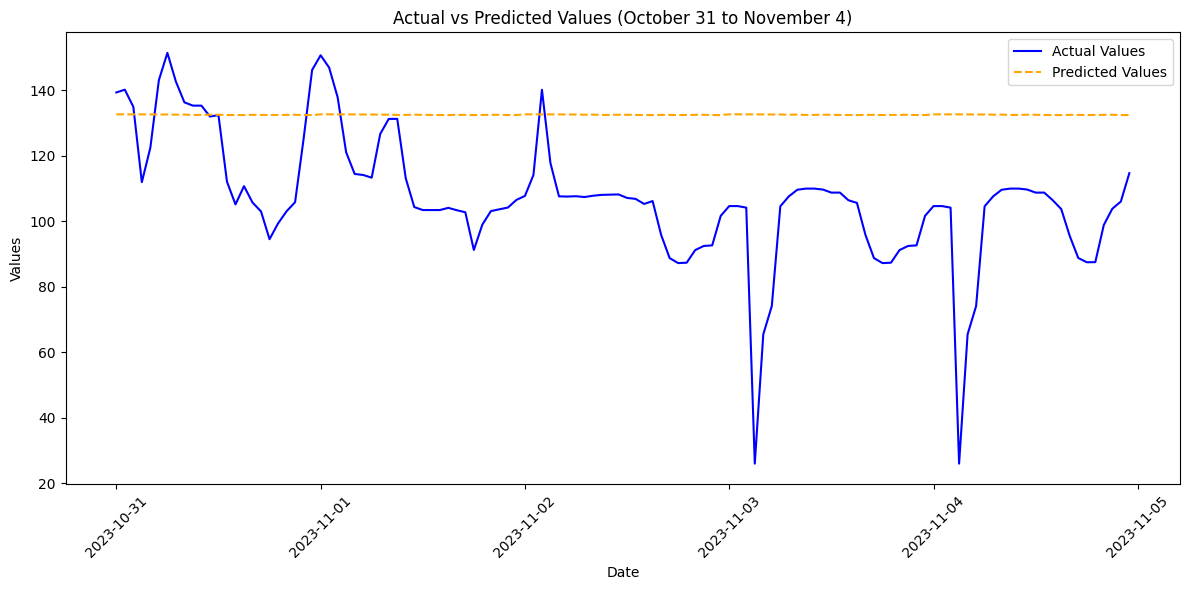

In [44]:
import matplotlib.pyplot as plt

# 결과 시각화 함수
def plot_results(actual_values, predicted_values, timestamps):
    plt.figure(figsize=(12, 6))

    # 실제값 플롯
    plt.plot(time_index, actual_values, label="Actual Values", color="blue")

    # 예측값 플롯
    plt.plot(time_index, predicted_values, label="Predicted Values", color="orange", linestyle="--")

    # 그래프 꾸미기
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title("Actual vs Predicted Values (October 31 to November 4)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 그래프 출력
    plt.show()

# 결과 시각화
plot_results(actual_values, predicted_values, timestamps)


In [45]:
results_df.to_excel('TFT.xlsx')
results_df

,timestamp,actual,predicted
0,2024-10-31 0:00,139.3175,132.633301
1,2024-10-31 1:00,140.1700,132.646240
2,2024-10-31 2:00,134.9450,132.624939
3,2024-10-31 3:00,111.9300,132.628601
4,2024-10-31 4:00,122.4725,132.620804
...,...,...,...
115,2024-11-04 19:00,87.5125,132.461044
116,2024-11-04 20:00,98.8600,132.482300
117,2024-11-04 21:00,103.8175,132.504532
118,2024-11-04 22:00,106.0175,132.426559


In [32]:
def calculate_measure1(actual, forecast):
    # 명시적으로 numpy 배열로 변환
    actual = np.array(actual, dtype=np.float32)
    forecast = np.array(forecast, dtype=np.float32)

    positive_index = actual > 0
    negative_index = actual <= 0
    actual[(actual <= 0) & (actual > -1)] = -1
    n1 = np.sum(positive_index) + 1e-7
    n2 = np.sum(negative_index) + 1e-7
    e1 = np.sum(np.abs(actual[positive_index] - forecast[positive_index]) / np.abs(actual[positive_index])) / n1
    e2 = np.sum(np.abs(actual[negative_index] - forecast[negative_index]) / np.abs(actual[negative_index])) / n2
    TP = np.sum((forecast > 0) & (actual > 0))
    TN = np.sum((forecast <= 0) & (actual <= 0))
    FP = np.sum((forecast > 0) & (actual <= 0))
    FN = np.sum((forecast <= 0) & (actual > 0))
    Accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-7)
    e_F = 0.2 * e1 + 0.8 * e2 - (Accuracy - 0.95)
    return e_F


In [47]:
import pandas as pd
import numpy as np

# 날짜별 손실 계산 함수
def calculate_daily_loss(results_df):
    daily_loss = {}

    # 날짜별로 그룹화
    results_df['timestamp'] = pd.to_datetime(results_df['timestamp'])
    results_df['date'] = results_df['timestamp'].dt.date  # 날짜만 추출
    grouped = results_df.groupby('date')  # 날짜별 그룹화

    for date, group in grouped:
        # 실제값과 예측값 추출
        actual = group['actual'].values
        forecast = group['predicted'].values

        # 손실 함수 계산
        loss = calculate_measure1(actual, forecast)
        daily_loss[date] = loss  # 날짜별 손실 저장

    return daily_loss

# Example DataFrame (results_df)
# Assume results_df has 'timestamp', 'actual', 'predicted' columns
# timestamp should be in pandas datetime format

# 날짜별 손실 계산
daily_loss = calculate_daily_loss(results_df)

# 결과 출력
for date, loss in daily_loss.items():
    print(f"Date: {date}, Total Loss: {loss:.4f}")


Date: 2024-10-31, Total Loss: -0.0222
Date: 2024-11-01, Total Loss: -0.0092
Date: 2024-11-02, Total Loss: 0.0077
Date: 2024-11-03, Total Loss: 0.0543
Date: 2024-11-04, Total Loss: 0.0495
